In [1]:
# Pre-processing of Dataset

In [23]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [24]:
img = cv2.imread('./test_images/luka1.jpg')
img.shape
#third dimension is rbg channel

(1440, 2560, 3)

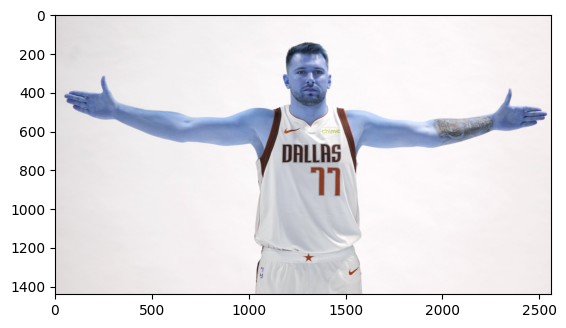

In [25]:
plt.imshow(img)
#cv2 loads images in BGR format while matplotlib expects RGB hence the image looking more blue

In [26]:
#convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape #2D array since there is no color channel

(1440, 2560)

In [27]:
#each pixel value represents the intensity of light
gray

array([[216, 216, 216, ..., 240, 240, 240],
       [216, 216, 216, ..., 240, 240, 240],
       [216, 216, 216, ..., 240, 240, 240],
       ...,
       [217, 217, 217, ..., 233, 232, 232],
       [217, 217, 217, ..., 233, 232, 232],
       [217, 217, 217, ..., 233, 232, 232]], dtype=uint8)

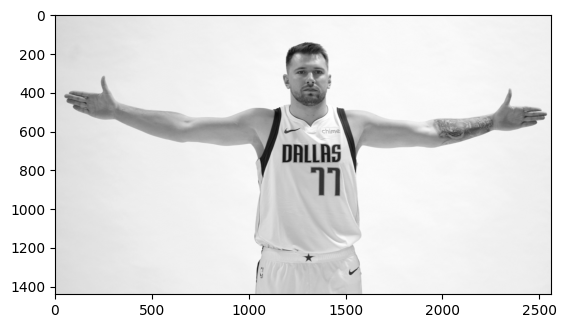

In [28]:
plt.imshow(gray, cmap='gray')

In [29]:
#use haarcascades from opencv to detect face and two eyes
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

#shows face coordinates (x, y, w, h)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[1195,  209,  233,  233]], dtype=int32)

In [30]:
(x, y, w, h) = faces[0]
x, y, w, h

(np.int32(1195), np.int32(209), np.int32(233), np.int32(233))

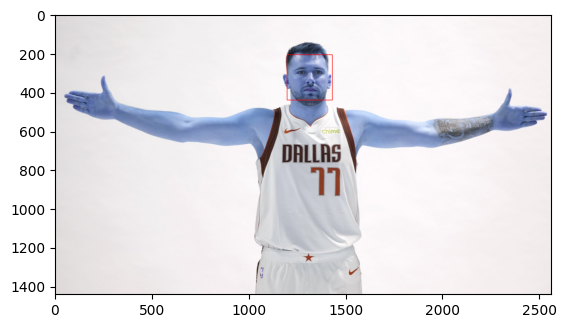

In [31]:
#draw the coordinates representing the face with red rectangle
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

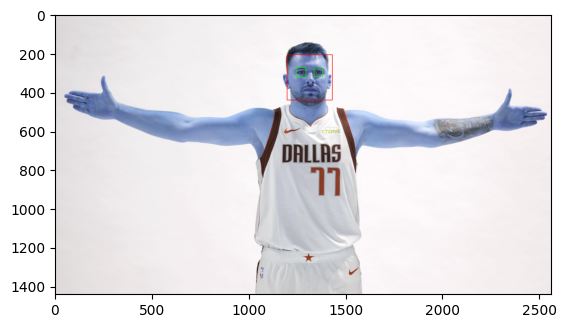

In [37]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    #detect the eyes and draw around them in green rectangle
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

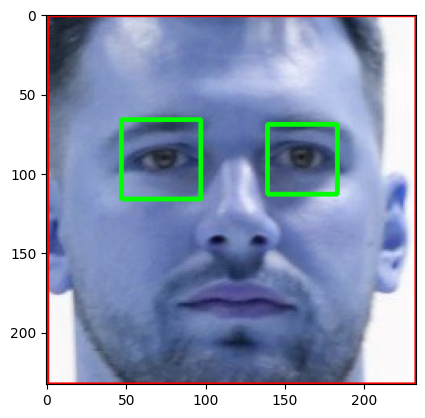

In [38]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
#crop the facial region

In [39]:
#python function that takes input image and returns cropped image
#if face and at least two eyes are detected
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

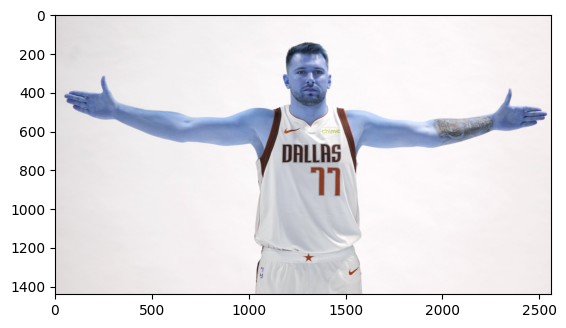

In [40]:
original_image = cv2.imread('./test_images/luka1.jpg')
plt.imshow(original_image)

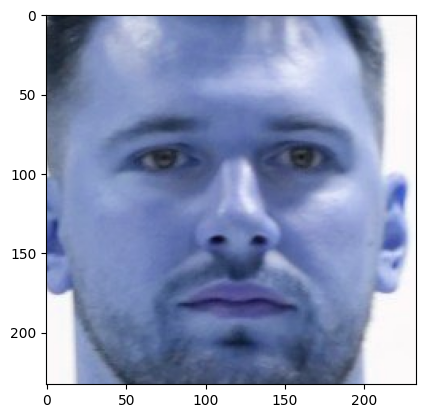

In [15]:
#testing the function
cropped_image = get_cropped_image_if_2_eyes('./test_images/luka1.jpg')
plt.imshow(cropped_image)

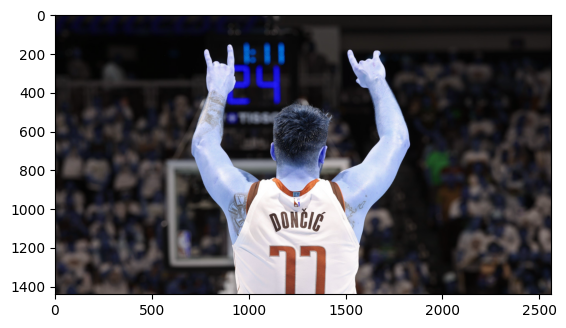

In [41]:
org_image_obstructed = cv2.imread('./test_images/luka2.jpg')
plt.imshow(org_image_obstructed)

In [42]:
#test on image where you can't see eyes -> returns nothing
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/luka2.jpg')
cropped_image_no_2_eyes

In [18]:
## Crop Dataset Images

In [48]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [49]:
#get image folder for each player
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./dataset/anthony_davis',
 './dataset/kevin_durant',
 './dataset/lebron_james',
 './dataset/luka_doncic',
 './dataset/stephen_curry']

In [50]:
#create cropped folder in dataset
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [51]:
#go through all images and created cropped images for each
#creates folder inside cropped folder for each player
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/anthony_davis
Generating cropped images in folder:  ./dataset/cropped/kevin_durant
Generating cropped images in folder:  ./dataset/cropped/lebron_james
Generating cropped images in folder:  ./dataset/cropped/luka_doncic
Generating cropped images in folder:  ./dataset/cropped/stephen_curry


In [65]:
#create new list of available images (some where manually deleted)
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'anthony_davis': ['./dataset/cropped/anthony_davis\\anthony_davis1.png',
  './dataset/cropped/anthony_davis\\anthony_davis10.png',
  './dataset/cropped/anthony_davis\\anthony_davis11.png',
  './dataset/cropped/anthony_davis\\anthony_davis12.png',
  './dataset/cropped/anthony_davis\\anthony_davis13.png',
  './dataset/cropped/anthony_davis\\anthony_davis14.png',
  './dataset/cropped/anthony_davis\\anthony_davis15.png',
  './dataset/cropped/anthony_davis\\anthony_davis16.png',
  './dataset/cropped/anthony_davis\\anthony_davis17.png',
  './dataset/cropped/anthony_davis\\anthony_davis18.png',
  './dataset/cropped/anthony_davis\\anthony_davis19.png',
  './dataset/cropped/anthony_davis\\anthony_davis2.png',
  './dataset/cropped/anthony_davis\\anthony_davis20.png',
  './dataset/cropped/anthony_davis\\anthony_davis21.png',
  './dataset/cropped/anthony_davis\\anthony_davis22.png',
  './dataset/cropped/anthony_davis\\anthony_davis24.png',
  './dataset/cropped/anthony_davis\\anthony_davis25.png',

In [66]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'anthony_davis': 0,
 'kevin_durant': 1,
 'lebron_james': 2,
 'luka_doncic': 3,
 'stephen_curry': 4}

In [ ]:
## Feature Engineering

In [67]:
#using PyWavelet for wavelet transformation of image
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [68]:
cropped_img = np.array(roi_color)
cropped_img.shape

(232, 232, 3)

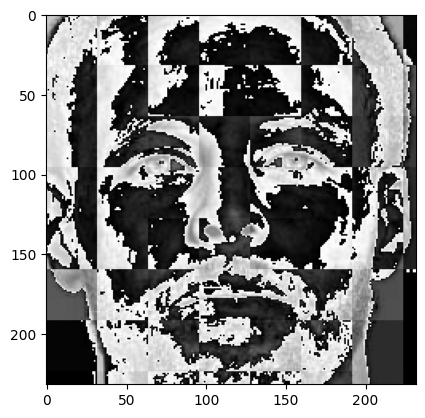

In [69]:
#helps to distinguish facial features
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [70]:
#use raw cropped images with wavelet transformed images to train classifier
#vertically stacking the images
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32)) #scale raw image
        img_har = w2d(img,'db1',5) #wavelet transform
        scalled_img_har = cv2.resize(img_har, (32, 32)) #scale wavelet image
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1))) #vertically stack
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

In [71]:
len(X[0]) #size of each combined image - 32 * 32 * 3 + 32 * 32

4096

In [72]:
X = np.array(X).reshape(len(X),4096).astype(float) #conversion to float
X.shape

(165, 4096)

In [73]:
X[0]

array([136., 135., 135., ...,  20.,  37.,  22.])

In [ ]:
## Train Model

In [61]:
#use SVM with RBF kernel and heuristic tuning
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7857142857142857

In [64]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.00      0.00      0.00         3
           2       0.73      0.73      0.73        11
           3       0.86      0.86      0.86         7
           4       0.87      0.93      0.90        14

    accuracy                           0.79        42
   macro avg       0.66      0.67      0.67        42
weighted avg       0.77      0.79      0.78        42



In [75]:
#gridsearch to try different models with different parameters
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [76]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [79]:
#go through all models and show best one
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model']) #scale and then train
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\Amy\anaconda3\envs\bbenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Amy\anaconda3\envs\bbenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Amy\anaconda3\envs\bbenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Amy\anaconda3\envs\bbenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'm

,model,best_score,best_params
0,svm,0.763000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.658333,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.828000,{'logisticregression__C': 1}


In [80]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [81]:
best_estimators['svm'].score(X_test,y_test)

0.8333333333333334

In [82]:
best_estimators['random_forest'].score(X_test,y_test)

0.6190476190476191

In [83]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8095238095238095

In [90]:
#choose svm as the model we're going to use
best_clf = best_estimators['svm']

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  1,  0,  0,  0],
       [ 0,  2,  1,  0,  0],
       [ 0,  2,  8,  0,  1],
       [ 0,  0,  0,  7,  0],
       [ 0,  1,  0,  1, 12]])

Text(95.72222222222221, 0.5, 'Truth')

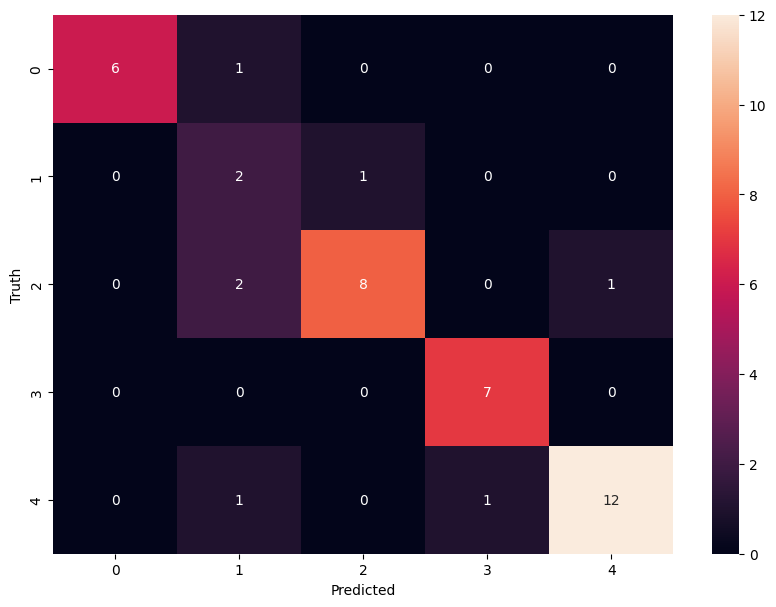

In [92]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [94]:
#save trained model
import joblib
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [95]:
#save class dictionary
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))